In [22]:
## Read table, combine table, parse the time string, save to pkl
## Visualize the excursion event
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
from scipy import signal
from scipy.fftpack import fft, ifft
pd.set_option('display.max_columns', 51)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}
plt.rc('font', **font)
import os 
dir_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(dir_path, '../data'))
print (data_dir)
combined_pkl = os.path.join(data_dir, "Combined.pkl")
combined_pkg_tbl = os.path.join(data_dir, 'combine_table.pkl')
part1_pkl = os.path.join(data_dir, "Part1.pkl")
part2_pkl = os.path.join(data_dir, "Part2.pkl")
%matplotlib inline

/home/ubuntu/workspace/unu_bhp_2018/data


In [3]:
file1 = os.path.join(data_dir,"Hackathon_DataSet_OctApr_Part1.txt")
file2 = os.path.join(data_dir,"Hackathon_DataSet_OctApr_Part2.txt")

file1_df = pd.read_table(file1, sep='\t', header=0, parse_dates=['TimeStamp'], index_col=["Id"])
file2_df = pd.read_table(file2, sep='\t', header=0, parse_dates=['TimeStamp'], index_col=["Id"])

In [4]:
file1_df.to_pickle(part1_pkl)
file2_df.to_pickle(part2_pkl)

In [5]:
print(len(file1_df.columns))
print(len(file2_df.columns))
print(file1_df.columns)
print(file2_df.columns)


40
50
Index(['hackathon4', 'TimeStamp', '05-PT-28201-01_B2_Manifold_Pressure (Psi)',
       '05-PT-28201-03_B2_Manifold_Pressure (Psi)',
       '05-PT-29101-02_C1_Manifold_Pressure (Psi)',
       '05-PT-29101-03_C1_Manifold_Pressure (Psi)',
       '05-PT-33101-02_G1_Manifold_Pressure (Psi)',
       '05-PT-33101-03_G1_Manifold_Pressure (Psi)',
       '05-PT-34101-01_H1_Manifold_Pressure (Psi)',
       '05-PT-34101-04_H1_Manifold_Pressure (Psi)',
       '05-TT-28201-01_B2_Manifold_Temperature (DegF)',
       '05-TT-28201-03_B2_Manifold_Temperature (DegF)',
       '05-TT-29101-02_C1_Manifold_Temperature (DegF)',
       '05-TT-29101-03_C1_Manifold_Temperature (DegF)',
       '05-TT-33101-02_G1_Manifold_Temperature (DegF)',
       '05-TT-33101-03_G1_Manifold_Temperature (DegF)',
       '05-TT-34101-01_H1_Manifold_Temperature (DegF)',
       '05-TT-34101-04_H1_Manifold_Temperature (DegF)',
       '20-HX-10003.Status_Flowline_From_Drill_Center_C ( )',
       '20-HX-10004.Status_Flowline_From_

In [6]:
print(len(file1_df), len(file2_df))

469441 469441


In [8]:
## Join the two tables
#file_df = pd.merge(file1_df, file2_df, on="TimeStamp")
#file_df.to_pickle(combined_pkl)

In [25]:
file_df = pd.read_pickle(combined_pkl)

file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469681 entries, 0 to 469680
Data columns (total 89 columns):
hackathon4_x                                                               469681 non-null object
TimeStamp                                                                  469681 non-null datetime64[ns]
05-PT-28201-01_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-28201-03_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-02_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-03_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-02_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-03_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-34101-01_H1_Manifold_Pressure (Psi)                                  469681 non-null 

In [26]:
file_df.head(5)

,hackathon4_x,TimeStamp,05-PT-28201-01_B2_Manifold_Pressure (Psi),05-PT-28201-03_B2_Manifold_Pressure (Psi),05-PT-29101-02_C1_Manifold_Pressure (Psi),05-PT-29101-03_C1_Manifold_Pressure (Psi),05-PT-33101-02_G1_Manifold_Pressure (Psi),05-PT-33101-03_G1_Manifold_Pressure (Psi),05-PT-34101-01_H1_Manifold_Pressure (Psi),05-PT-34101-04_H1_Manifold_Pressure (Psi),05-TT-28201-01_B2_Manifold_Temperature (DegF),05-TT-28201-03_B2_Manifold_Temperature (DegF),05-TT-29101-02_C1_Manifold_Temperature (DegF),05-TT-29101-03_C1_Manifold_Temperature (DegF),05-TT-33101-02_G1_Manifold_Temperature (DegF),05-TT-33101-03_G1_Manifold_Temperature (DegF),05-TT-34101-01_H1_Manifold_Temperature (DegF),05-TT-34101-04_H1_Manifold_Temperature (DegF),20-HX-10003.Status_Flowline_From_Drill_Center_C ( ),20-HX-10004.Status_Flowline_From_Drill_Center_C ( ),20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( ),20-HX-20004.Status_Flowline_From_Drill_Centers_B&G ( ),20-PIC-10114.PV_P2_Subsea_Flowline_Eq_Choke_%_Open (PSIG),20-PIC-10214.PV_P1_Subsea_Flowline_Eq_Choke_%_Open (PSIG),20-PT-10007-01.PV_Flowline_From_Drill_Center_C (PSIG),...,21-TT-10508.PV_Prod_Sep_Gas_Out_To_Flash_Clr (Deg.F),21-TT-10608.PV_Prod_Sep_2nd_Stg_Gas_Out (Deg.F),21-TT-11616.PV_Crude_Oil_Trim_Heat_Outlet (Deg.F),30-FT-19107-01.PV_2nd_Stg_Hydrocyclone_Inlet (BPD),30-FT-19108.PV ( ),30-FT-29108.PV (BPD),30-FT-69521-01.PV_Flotation_Cell_Prod_Wtr_To_Ovbrd (BPD),30-LIC-69516.CV_Flotation_Cell_Out_To_Drn (%),30-LIC-69518.CV_Flotation_Cell_Prod_Wtr_To_Ovbrd (%),30-LT-69514.PV_Flotation_Cell (%),30-LT-69515.PV_Flotation_Cell (%),30-LT-69516.PV_Flotation_Cell (%),30-LT-69518.PV_Flotation_Cell (%),30-LY-69518.OUT_Flotation_Cell_Prod_Wtr_To_Ovbrd (%),30-PDIC-19104.SP_2nd_Stg_Prod_Hydrocyclone_Out ( ),30-PDT-19104-01.PV_2nd_Stg_Hydrocyclone_Out_To_Drn (PSID),30-PDT-19104-02.PV_2nd_Stg_Hydrocyclone_To_Skimmer (PSID),30-PDT-19104.PV_2nd_Stg_Hydrocyclone_Out_To_Drn_Diff_Press_Ratio (PSID),30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%),30-PT-69503.PV_Flotation_Cell (PSIG),30-PT-69512.PV (psig),30-PY-69503.OUT_Flotation_Cell_Out_To_LP_Flare (%),37-PT-62301.PV_Closed_Smp_Tk_Pmp_Disch_To_Sep (PSIG),PIIntTSTicks_y,PIIntShapeID_y
0,hackathon4,2016-10-20 00:00:00,966.381897,1004.695740,1754.836670,911.066284,1061.527222,1025.542603,958.443115,1723.516602,162.461395,142.916428,40.297356,111.148277,152.158524,41.248680,102.671295,41.268318,Closed,Open,Open,FAIL,187.473465,254.913010,191.211243,...,73.130829,125.887375,129.744720,4.189253,5742.936035,4736.104980,12053.009766,0.0,39.519337,31.173611,76.055481,28.691677,78.771912,39.519337,1.0,9.768112,9.703619,0.965848,42.564075,3.296184,2.667331,0.0,-1.208175,636125364000000000,0
1,hackathon4,2016-10-20 00:00:30,966.362854,1004.681519,1754.714600,911.771423,1061.473511,1025.534912,958.766968,1725.141846,162.352066,142.916046,40.297363,111.129425,152.138550,41.248692,102.635017,41.268200,Closed,Open,Open,FAIL,187.368179,227.374268,192.676483,...,73.107445,125.678886,130.235901,3.864418,5708.892090,4735.895020,12977.514648,0.0,43.453060,31.404886,76.023933,28.772745,78.678864,43.453060,1.0,9.773479,9.755747,0.965457,42.561581,3.255860,2.631529,0.0,-0.869427,636125364300000000,0
2,hackathon4,2016-10-20 00:01:00,966.271118,1004.667358,1754.900879,911.257996,1061.568604,1025.527344,959.532166,1722.426392,162.450058,142.915680,40.297371,111.122307,152.198746,41.248699,102.665077,41.268085,Closed,Open,Open,FAIL,187.463776,238.891373,191.361145,...,73.084061,125.470390,130.483276,3.727489,5781.888672,4673.041504,12057.237305,0.0,40.615211,30.981592,75.206039,28.853815,77.945999,40.615211,1.0,9.913736,9.876377,0.965067,42.546371,3.215535,2.564965,0.0,-0.388303,636125364600000000,0
3,hackathon4,2016-10-20 00:01:30,966.392029,1004.678101,1754.978882,911.025330,1061.569458,1025.519653,959.556580,1723.165283,162.417374,142.915314,40.297379,111.139427,152.258957,41.248711,102.690414,41.267971,Closed,Open,Open,FAIL,187.391022,238.000229,191.177139,...,73.060669,125.378426,130.5

In [11]:
# Important Columns PT-10605, '20-PT-10007-01.PV_Flowline_From_Drill_Center_C (PSIG)', 

In [14]:
plt.rcParams.update({'font.size': 16})
datefmt = mdates.DateFormatter('%d/%H%M')
def time_fft(datetime, y):
    '''
    input: array of datetime object
           y signal
    Output: frequency, ABS(signal)
    '''
    N = len(y)
    y_f = np.fft.fft2(y - np.mean(y))
    y_f = y_f[0:int(N/2)] ## Nyquist
    f_max= 1/((datetime[1] - datetime[0]).item()/1e9)/2
    f = np.linspace(0, f_max, len(y_f))
    return f, abs(y_f)
def lp_butter(y, Wn = 0.2):
    n = len(y)
    b, a = signal.butter(4, Wn, 'low')
    output_signal = signal.filtfilt(b, a, y, axis=0)
    return output_signal

def normalize_for_plot(v):
    v_mean=np.mean(v)
    v = v - v_mean
    v_min, v_max = min(v), max(v)
    v = v / max([abs(v_min), abs(v_max)])
    return v
def plot_features(df, start_time, end_time, features, normalized=True, lp_filter = True, legend_on=True):
    '''
    plot the feautres for EDA in different time range
    Feature is suggested to normalize for feature comparison
    '''
    fig, ax = plt.subplots(figsize=(15,8))
    time_range = (df["TimeStamp"] < end_time)&(df["TimeStamp"] > start_time)
    x = df.loc[time_range,["TimeStamp"]].values
    for feature in features:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax.plot(x, y, label = feature)
    ax.xaxis.set_major_formatter(datefmt)
    if legend_on:
        plt.legend(features)

Text(0.5,1,'Jan 28, 2017')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


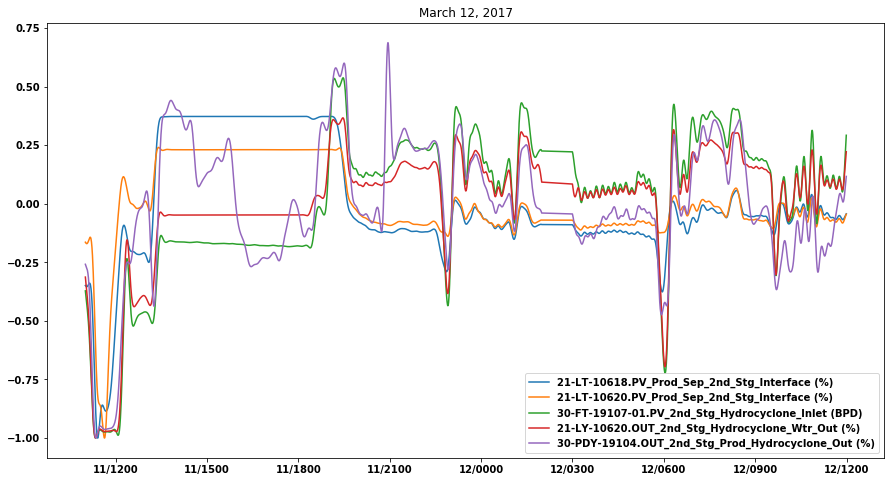

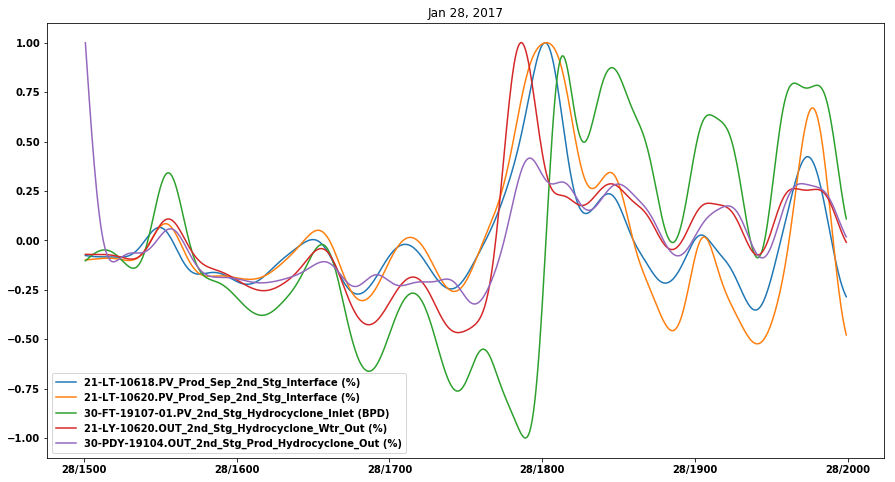

In [17]:
## Feature selection based on PFD map 
## From downstream to upstream. Please check the map for the corresponding location

separator_2nd_features = ["21-PT-10605.PV_Prod_Sep_2nd_Stg (PSIG)",
                      "21-LY-10616.OUT_Prod_Sep_2nd_Stg_Fluid_To_Exch (%)",
                          "21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)",
                         "30-FT-19107-01.PV_2nd_Stg_Hydrocyclone_Inlet (BPD)",
                         "21-LIC-10620.SP_2nd_Stg_Hydrocyclone_Wtr_Out (%)",
                          "21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)",
                          "21-LY-10620.OUT_2nd_Stg_Hydrocyclone_Wtr_Out (%)"
                         ]
separator_1st_1_features = ["21-PT-10505.PV_Production_Separator (PSIG)",
                            "21-FQI-10518-01.NetRate.PV (BPD)",
                            "21-LIC-10516.SP_Prod_Sep_Oil_Out_To_2nd_Stg_Sep (%)",
                            "21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)",
                            "21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)"
                           ]
separator_1st_2_features = ["21-PT-40505.PV_Test_Allocation_Separator (PSIG)",
                            "21-FT-40518-03_Density_(Coriolis) (g/cc)",
                            "21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)",
                            "21-LIC-40516.SP_Test_Allocation_Sep_Interface (%)",
                            "21-LT-40516.PV_Test_Allocation_Sep_Interface (%)",
                            "21-LY-40516.OUT (%)"
                            ]
heatexchanger_p2_features = ["20-ZT-10204.PV_To/From_Subsea_Flowline (%)",
                            "20-TT-10205.PV_Subsea_Flowline_Test_Sep (Deg.F)",
                            "20-PT-10007-01.PV_Flowline_From_Drill_Center_C (PSIG)"
                            ]
heatexchanger_p1_features = ["20-ZT-10104.PV_To/From_Subsea_Flowline (%)",
                            "20-PT-10008-01.PV_Flowline_From_Drill_Center_C (PSIG)",
                            "20-TT-10105.PV_Subsea_Flowline_To_Train_1 (Deg.F)"
                            ]
heatexchanger_p6_features = ["20-ZT-20104.PV_Train_2_Subsea_Flowline_Launcher (%)",
                            "20-PT-20008-01.PV_Flowline_From_Drill_Centers_B&G (PSIG)",
                            "20-TT-20105.PV_Train_2_Subsea_Flowline_Launcher (Deg.F)"
                            ]
downhole_H_p2_features = ["05-PT-34101-04_H1_Manifold_Pressure (Psi)",
                          "05-TT-34101-04_H1_Manifold_Temperature (DegF)"
                          
                      ]
downhole_H_p1_features = ["05-PT-34101-01_H1_Manifold_Pressure (Psi)",
                          "05-TT-34101-01_H1_Manifold_Temperature (DegF)"
                      ]
downhole_C_p2_features = ["05-PT-29101-02_C1_Manifold_Pressure (Psi)",
                          "05-TT-29101-02_C1_Manifold_Temperature (DegF)"
                      ]
downhole_C_p1_features = ["05-PT-29101-03_C1_Manifold_Pressure (Psi)",
                          "05-TT-29101-03_C1_Manifold_Temperature (DegF)"
                      ]
downhole_B_p6_features = ["05-PT-28201-01_B2_Manifold_Pressure (Psi)",
                          "05-TT-28201-01_B2_Manifold_Temperature (DegF)"
                      ]
downhole_G_p6_features = ["05-PT-33101-03_G1_Manifold_Pressure (Psi)",
                          "05-TT-33101-03_G1_Manifold_Temperature (DegF)"
                      ]

## Super important Feature to analyze and identify excursion event. 
## Level indicator 21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%) doesn't drop as much as 
## Level indicator 21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%). The mismatch between those two indicator
## 30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%) : The oil ouput at Hydrocyclone drops correspondingly to those events

separator_2nd_features_e = [
                           "21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)",
                           "21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)",
                            "30-FT-19107-01.PV_2nd_Stg_Hydrocyclone_Inlet (BPD)",
                            "21-LY-10620.OUT_2nd_Stg_Hydrocyclone_Wtr_Out (%)",
                            "30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%)"
                         ]

## March 12, 2017
start_time = datetime(2017, 3, 11,11,0)
end_time = datetime(2017, 3, 12, 12,0)

plot_features(file_df, start_time, end_time, separator_2nd_features_e, lp_filter=True, normalized=True)
plt.title("March 12, 2017")
#plot_features(file_df, start_time, end_time, separator_2nd_features_e, lp_filter=False)

## Jan 28, 2017
start_time = datetime(2017, 1, 28,15,0)
end_time = datetime(2017, 1, 28, 20,0)
plot_features(file_df, start_time, end_time, separator_2nd_features_e, lp_filter=True, normalized=True)
plt.title("Jan 28, 2017")

Text(0.5,1,'Nov 16, 2016')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


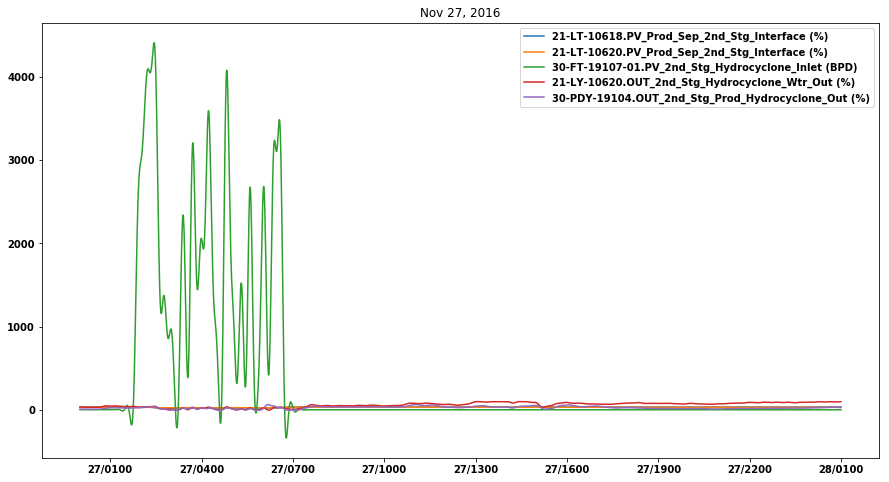

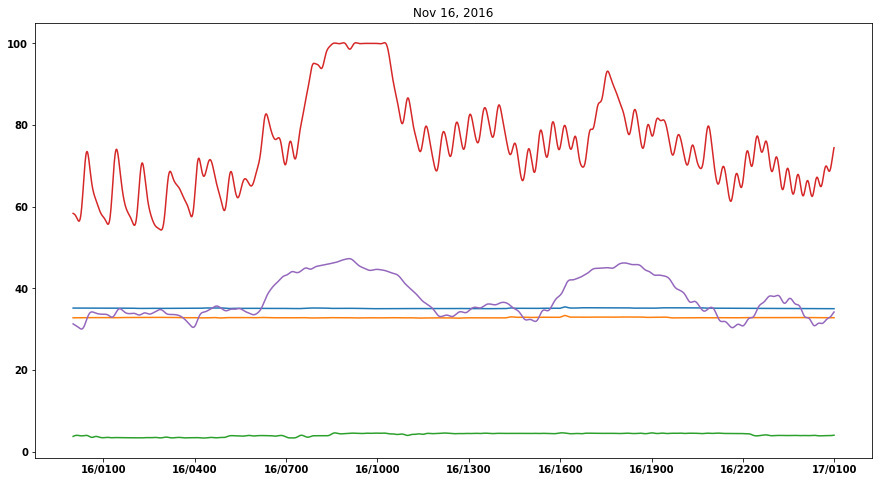

In [18]:
## Nov 27, 2016
start_time = datetime(2016, 11, 27,0,0)
end_time = datetime(2016, 11, 28, 1,0)
plot_features(file_df, start_time, end_time, separator_2nd_features_e, lp_filter=True, normalized=False)
plt.title("Nov 27, 2016")

## Nov 16, 2016
start_time = datetime(2016, 11, 16,0,0)
end_time = datetime(2016, 11, 17, 1,0)
plot_features(file_df, start_time, end_time, separator_2nd_features_e, lp_filter=True, normalized=False, legend_on=False)
plt.title("Nov 16, 2016")

Text(0.5,1,'Oct 26, 2016')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


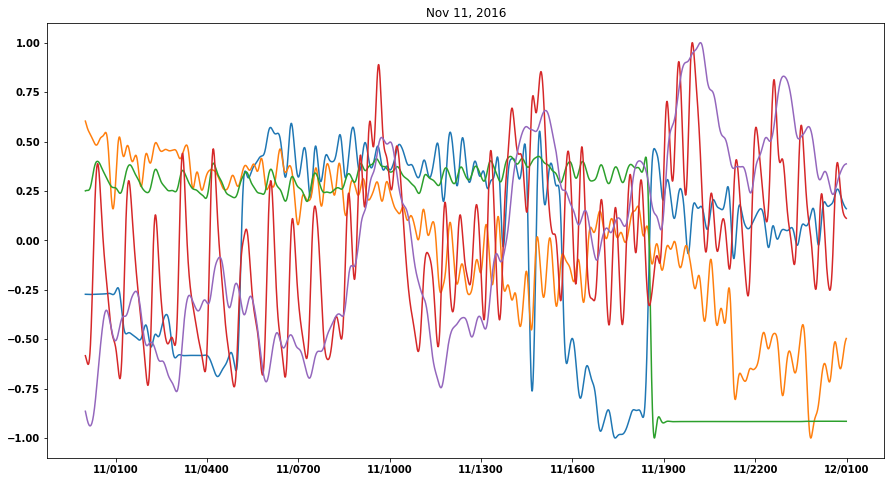

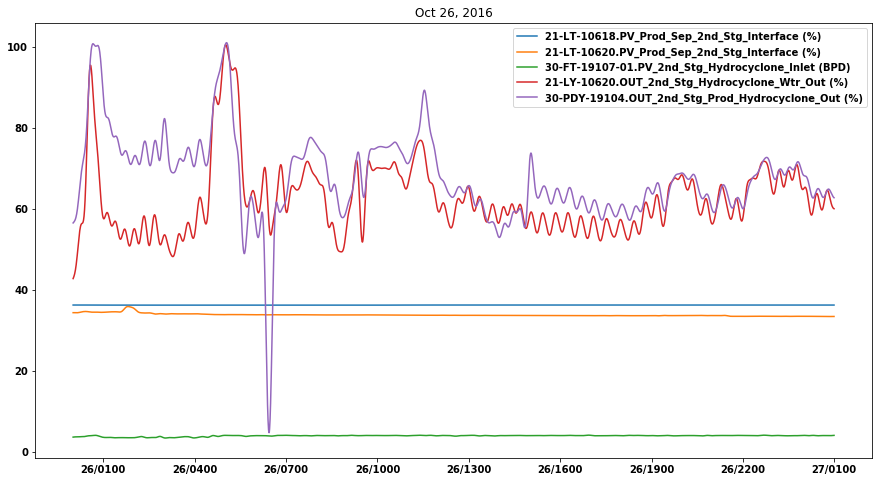

In [19]:
## Nov 11, 2016
start_time = datetime(2016, 11, 11,0,0)
end_time = datetime(2016, 11, 12, 1,0)
plot_features(file_df, start_time, end_time, separator_2nd_features_e, lp_filter=True, normalized=True, legend_on=False)
plt.title("Nov 11, 2016")

## Oct 26, 2016
start_time = datetime(2016, 10, 26,0,0)
end_time = datetime(2016, 10, 27, 1,0)
plot_features(file_df, start_time, end_time, separator_2nd_features_e, lp_filter=True, normalized=False, legend_on=True)
plt.title("Oct 26, 2016")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


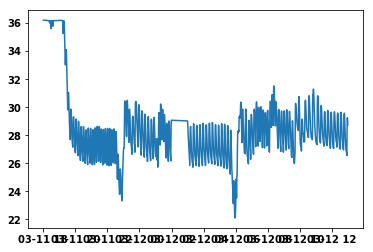

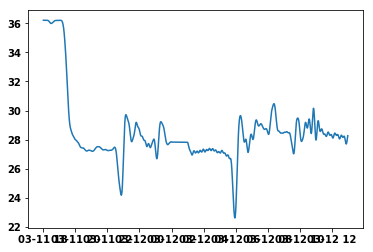

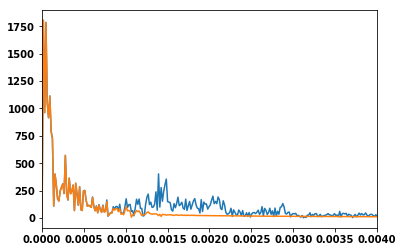

In [21]:
## Fourier analysis to get better S/N for excursion event
from scipy.fftpack import fft
from scipy import signal
import numpy as np

def time_fft(datetime, y):
    '''
    input: array of datetime object
           y signal
    Output: frequency, ABS(signal)
    '''
    N = len(y)
    y_f = np.fft.fft2(y - np.mean(y))
    y_f = y_f[0:int(N/2)] ## Nyquist
    f_max= 1/((datetime[1] - datetime[0]).item()/1e9)/2
    f = np.linspace(0, f_max, len(y_f))
    return f, abs(y_f)
def lp_butter(y, Wn = 0.2):
    n = len(y)
    b, a = signal.butter(4, Wn, 'low')
    output_signal = signal.filtfilt(b, a, y, axis=0)
    return output_signal


start_time = datetime(2017, 3, 11,18,0)
end_time = datetime(2017, 3, 12, 13,0)
time_range = (file_df["TimeStamp"] < end_time)&(file_df["TimeStamp"] > start_time)
x = file_df.loc[time_range,["TimeStamp"]].values
y = file_df.loc[time_range, ["21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)"]].values
plt.plot(x, y)
plt.show()
## A butterworth filter has to be applied
y_lp = lp_butter(y, 0.06)
plt.plot(x, y_lp)
plt.show()
f, y_f = time_fft(x, y)
f, y_ff = time_fft(x, y_lp)
plt.plot(f, y_f, f, y_ff)
plt.xlim([0,0.004])
plt.show()